In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Solver import chebyshev_shifted, plot_graphics, print_table, solve_examples

In [16]:
def example_2_problem():
    """
    Example 2: y(t) = 1 + t - t^2 + 3/(2√(2-1)) * integral
    Exact solution: y(t) = 1 + t
    """
    def nonlinear_function(cos_t, s_j_tensor, y_s):
        return (cos_t /cos_t)*((1 + s_j_tensor) / np.sqrt(y_s))**2
    def exact_solution(t):
        return 1 + t
    return nonlinear_function, exact_solution

def cheb2(t_array):
    is_scalar = np.isscalar(t_array)
    t = np.atleast_1d(t_array)
    results = np.zeros_like(t)
    for i, t_val in enumerate(t):
        T0 = chebyshev_shifted(t_val, 0)
        T1 = chebyshev_shifted(t_val, 1)
        T2 = chebyshev_shifted(t_val, 2)
        T3 = chebyshev_shifted(t_val, 3)
        T4 = chebyshev_shifted(t_val, 4)
        T5 = chebyshev_shifted(t_val, 5)
        T6 = chebyshev_shifted(t_val, 6)
        T7 = chebyshev_shifted(t_val, 7)
        denominator = (8.34626842e-1 * T0 - 1.43734156e-1 * T1 + 1.85187311e-2 * T2 - 2.64941574e-3 * T3 + 3.97902662e-4 * T4 - 6.14969223e-5 * T5 + 9.91515024e-6*T6 - 1.54038746e-6*T7)**2
        results[i] = 1.0 / denominator
    return results[0] if is_scalar else results


--- Solving Example 2 ---


Loss = 1.0127231909e-08: 100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]


Starting L-BFGS optimization...
Training completed in 174.31 seconds
Final Loss: 1.1998318787e-08


Using features ['x0']


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           76     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19983D-08    |proj g|=  7.21793D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   76      0      1      0     0     0   7.218D-07   1.200D-08
  F =   1.1998318786815438E-008

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.880e+04
Progress: 349 / 800 total iterations (43.625%)
════════════════════════════════════════════════════════════════════════════════════════════════════

Symbolic Approximation:
y(t) = x_{0} + e^{\left(x_{0} + \left(0.6072684682829799 - x_{0} x_{0} x_{0} \cdot 0.8859131709327721\right) \left(x_{0} x_{0} x_{0} - \left(x_{0} - 0.4226271027816656\right) 0.7832909446428532\right)\right) 3.177958252126249 \cdot 10^{-11}}


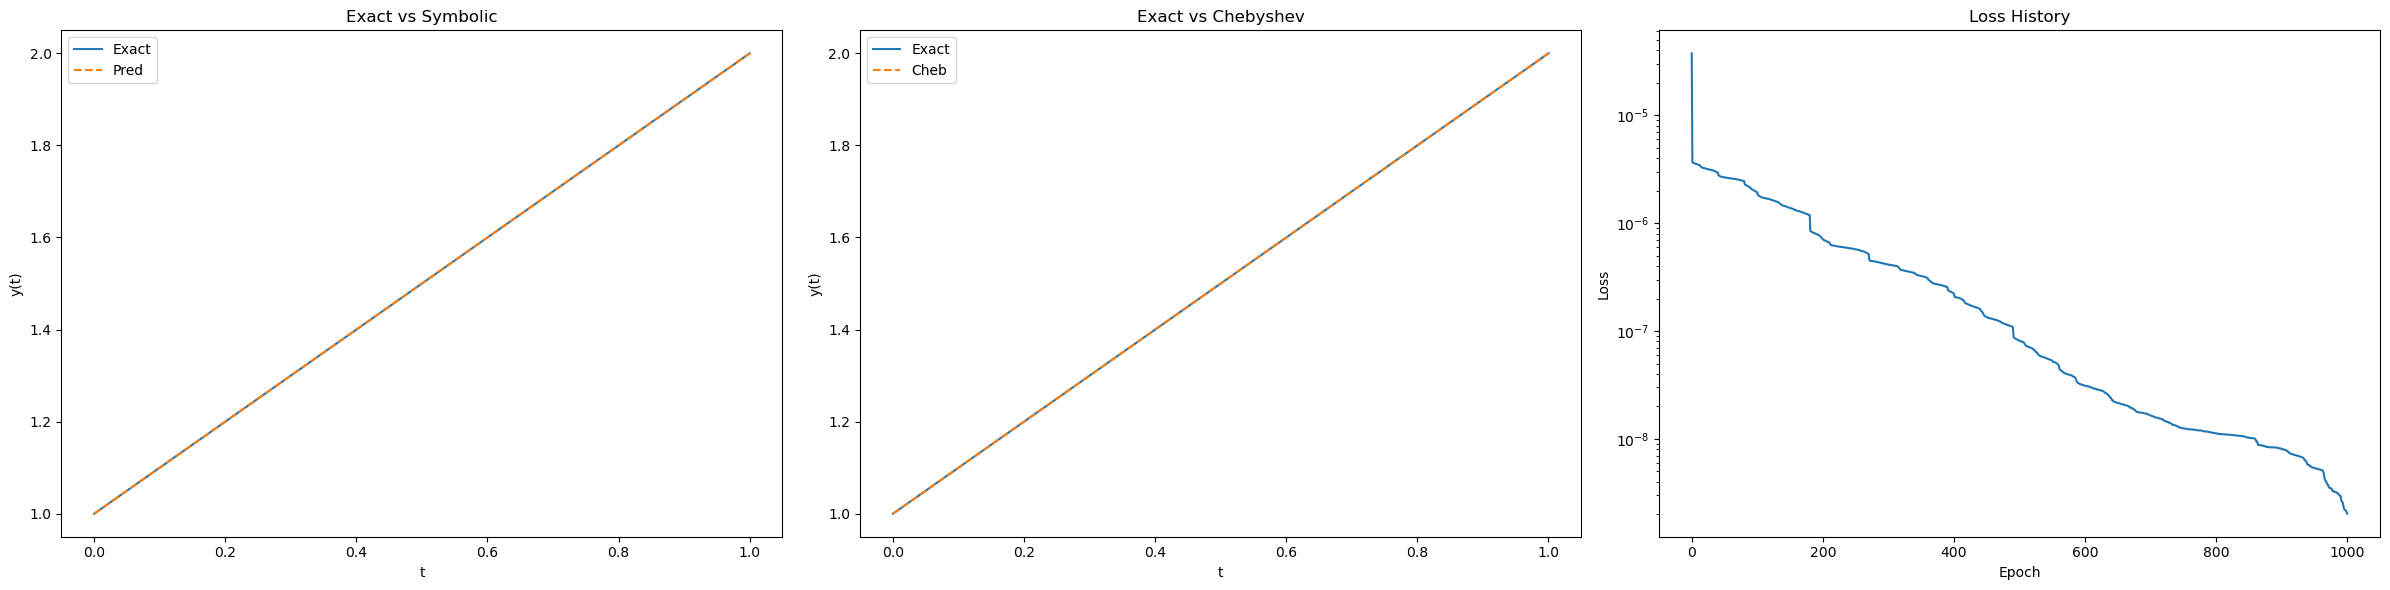

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|t	 |Exact				 |Symbolic			 |Sym Abs err			 |Chebyshev			|Cheb Abs err		 |Win|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.0	 |1.00000000000000000000 	 |1.00000000000638866737 	 |0.00000000000638866737	 |1.00000000007599987306 	|0.00000000007599987306	 |Yes|
|0.1	 |1.10101010101010099440 	 |1.10101010101818541642 	 |0.00000000000808442202	 |1.10000087548208047572 	|0.00100922552802051868	 |Yes|
|0.2	 |1.20202020202020198880 	 |1.20202020203007409194 	 |0.00000000000987210313	 |1.19999974116006491442 	|0.00202046086013707438	 |Yes|
|0.3	 |1.30303030303030298320 	 |1.30303030304218281366 	 |0.00000000001187983045	 |1.29999854879331055990 	|0.00303175423699242330	 |Yes|
|0.4	 |1.40404040404040397760 	

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [17]:
res = solve_examples(example_2_problem, idx="2", num_operator=["exp"])
plot_graphics(res, 2, cheb2)
print_table(cheb2, res, 2)

Symbolic Output 
$$y(t) = t + e^{\left(t + \left(0.6072684682829799 - t^3 \cdot 0.8859131709327721\right) \left(t^3 - \left(t - 0.4226271027816656\right) 0.7832909446428532\right)\right) 3.177958252126249 \cdot 10^{-11}}$$